In [7]:
import torch
from torchvision import datasets, transforms

import helper

# normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# download training data and put into dataloader
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# download and load test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Viewing images

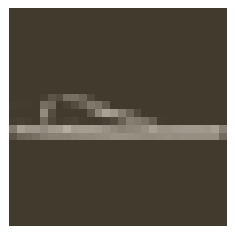

In [8]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

# Defining network architecture
Creating fully connected nn with 3 hidden layers and dropout

In [ ]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # flattening input
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        #no dropout for output layer
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

# Training and evaluation

In [34]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        #forward pass
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        #gradient descent
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        #turning off gradients for speed
        with torch.no_grad():
            
            #switching to evaluation mode so there's no dropout
            model.eval()
            for images, labels in testloader:
                
                #pass in test model
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                #finding accuracy
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        #return to train mode
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.518..  Test Loss: 0.434..  Test Accuracy: 0.847
Epoch: 2/30..  Training Loss: 0.392..  Test Loss: 0.396..  Test Accuracy: 0.856
Epoch: 3/30..  Training Loss: 0.355..  Test Loss: 0.399..  Test Accuracy: 0.855
Epoch: 4/30..  Training Loss: 0.337..  Test Loss: 0.402..  Test Accuracy: 0.862
Epoch: 5/30..  Training Loss: 0.317..  Test Loss: 0.370..  Test Accuracy: 0.871
Epoch: 6/30..  Training Loss: 0.304..  Test Loss: 0.349..  Test Accuracy: 0.873
Epoch: 7/30..  Training Loss: 0.289..  Test Loss: 0.374..  Test Accuracy: 0.870
Epoch: 8/30..  Training Loss: 0.282..  Test Loss: 0.378..  Test Accuracy: 0.871
Epoch: 9/30..  Training Loss: 0.273..  Test Loss: 0.389..  Test Accuracy: 0.870
Epoch: 10/30..  Training Loss: 0.267..  Test Loss: 0.400..  Test Accuracy: 0.867
Epoch: 11/30..  Training Loss: 0.257..  Test Loss: 0.362..  Test Accuracy: 0.879
Epoch: 12/30..  Training Loss: 0.251..  Test Loss: 0.362..  Test Accuracy: 0.880
Epoch: 13/30..  Training Loss: 0.248.

# Viewing results

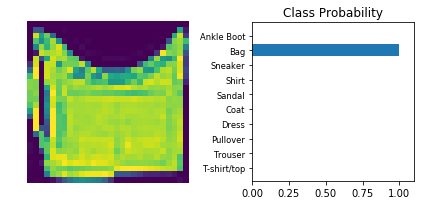

In [16]:
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')